In [13]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


CSV_FILE = "../data/ab-test.csv"
DB_FILE = "../data/checking-logs.sqlite"

* create a dataframe where each user of the test group has the average difference,
number of pageviews and number of commits
* do not take project1 into account for calculations of the average difference and the
number of commits
* take the number of commits from the checker table
* the figsize is still the same, you can choose whatever fontsize you like as well as the
color palette
* the size of the dots should be 200
* the width of the lines of the diagonal graphs (kde) should be 3
* at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
  * “Can we say that if a user has a low number of pageviews then they likely
have a low number of commits?” The answer: yes or no. 
  * “Can we say that if a user has a low number of pageviews then they likely have
a small average difference between the first commit and the lab deadline?” The
answer: yes or no. 
  * “Can we say that there are many users with a low number of commits and a
few with a high number of commits”? The answer: yes or no. 
  * “Can we say that there are many users with a small average difference and a
few with a large average difference”? The answer: yes or no.

In [14]:
con_obj = sqlite3.connect(DB_FILE)

In [15]:
df_test_group = pd.read_csv(CSV_FILE, sep=',')
df_test_group = df_test_group[df_test_group['group'] == 'test']
avg_diff = df_test_group.groupby('uid').agg({'diff' : 'mean'}).rename(columns={'diff':'avg_diff'})
avg_diff

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667
user_28,-94.750000
user_3,-114.250000


In [16]:
query = """
  SELECT
    p.uid,
    p.pageviews,
    c.num_commits
  FROM (
    SELECT uid, COUNT(datetime) AS pageviews
    FROM pageviews
    WHERE uid LIKE 'user_%'
    GROUP BY uid
  ) p 
  JOIN (
    SELECT uid, COUNT(timestamp) AS num_commits
    FROM checker
    WHERE uid LIKE 'user_%' AND labname <> 'project1'
    GROUP BY uid
  ) c
  ON p.uid = c.uid
"""

df_count = pd.read_sql(query, con_obj)
df_count

,uid,pageviews,num_commits
0,user_1,28,62
1,user_10,89,20
2,user_14,143,61
3,user_17,47,51
4,user_18,3,5
5,user_19,16,118
6,user_21,10,65
7,user_25,179,79
8,user_28,149,60
9,user_3,317,18


In [17]:
df_result = pd.merge(left=avg_diff, right=df_count, on='uid', how='inner')
df_result

,uid,avg_diff,pageviews,num_commits
0,user_1,-54.666667,28,62
1,user_18,-6.750000,3,5
2,user_19,-115.166667,16,118
3,user_21,-95.500000,10,65
4,user_25,-98.416667,179,79
5,user_28,-94.750000,149,60
6,user_3,-114.250000,317,18


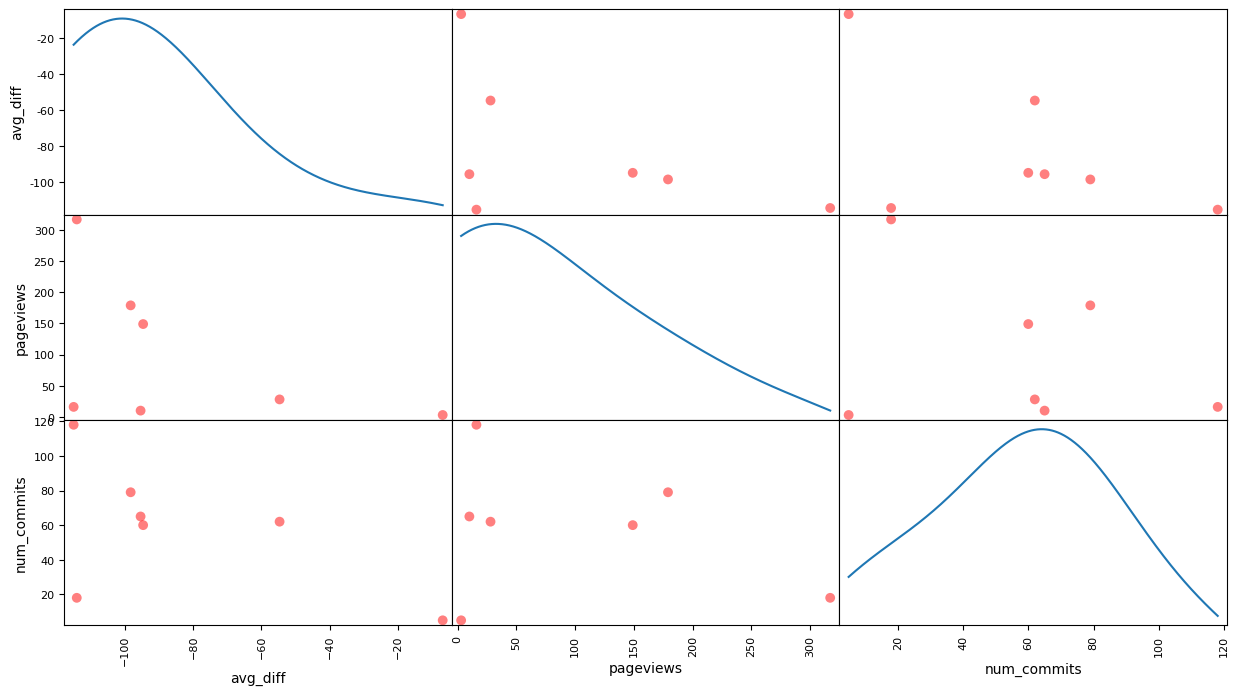

In [18]:
pd.plotting.scatter_matrix(df_result, figsize=(15,8), diagonal='kde', color='red', s=200)
plt.show()

In [19]:
con_obj.close()